In [1]:
#from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt
#import corner
import urllib
import os
import sys
from astropy.io import fits
from sklearn.model_selection import train_test_split
import pandas as pd
from astropy.cosmology import Planck15 as P15
from astropy import units as u
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
sns.set_context("talk",font_scale=1.5)

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
path = '/Users/alexgagliano/Documents/Research/DESC/tables/CosmoDC2'
path_matched = '/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/'

dc2_rand = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/rand_hostlib_wIxx.tar.gz")
#dc2_rand = pd.read_csv("/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample/cdc2_matched_fullSamples/rand_hostlib_ellip.tar.gz")

In [4]:
dc2_rand.sample(n=100).columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'DC2SFRtot', 'DC2redshift',
       'Ixx_pixel', 'Iyy_pixel', 'Mag_true_g_sdss_z0',
       'Mag_true_i_sdss_z0', 'Mag_true_r_sdss_z0', 'Mag_true_z_sdss_z0',
       'PZflowSFRtot', 'PZflowredshift', 'cosmodc2_id_truth', 'dec',
       'g-r', 'galaxy_id', 'i-z', 'mag_err_g_photoz', 'mag_err_i_photoz',
       'mag_err_r_photoz', 'mag_err_u_photoz', 'mag_err_y_photoz',
       'mag_err_z_photoz', 'mag_true_Y_lsst', 'mag_true_g_lsst',
       'mag_true_i_lsst', 'mag_true_r_lsst', 'mag_true_u_lsst',
       'mag_true_z_lsst', 'morphology/totalEllipticity',
       'position_angle_true', 'r-i', 'ra', 'sersic_bulge', 'sersic_disk',
       'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true',
       'size_minor_disk_true', 'size_minor_true', 'size_true',
       'stellar_mass', 'bulge_to_total_ratio_i'], dtype=object)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


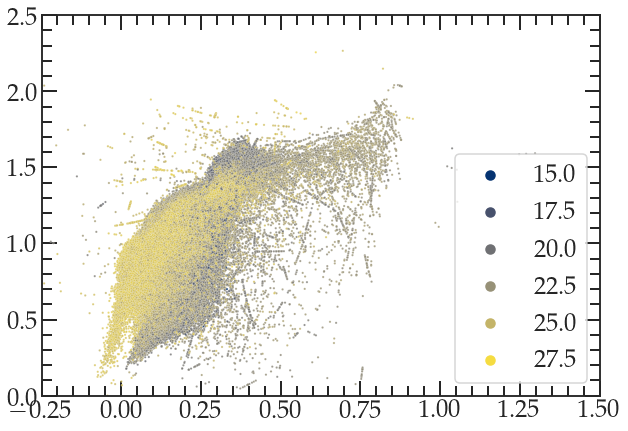

In [5]:
dc2_test = dc2_rand[dc2_rand['PZflowredshift']<0.6]
x = dc2_test['mag_true_i_lsst'].values

plt.figure(figsize=(10,7))
plt.xlim((-0.25, 1.5))
plt.ylim((0, 2.5))
sns.scatterplot(dc2_test['mag_true_i_lsst'] - 
                dc2_test['mag_true_z_lsst'], 
                dc2_test['mag_true_g_lsst'] - 
                dc2_test['mag_true_r_lsst'], 
                hue=x, s=5, alpha=0.8, palette='cividis', legend=True)

In [16]:
dc2_rand

,Unnamed: 0,Unnamed: 0.1,DC2SFRtot,DC2redshift,Ixx_pixel_x,Iyy_pixel_x,Mag_true_g_sdss_z0,Mag_true_i_sdss_z0,Mag_true_r_sdss_z0,Mag_true_z_sdss_z0,...,size_true,stellar_mass,bulge_to_total_ratio_i,redshift,SFRtot,GHOST_objID,objectId,Ixx_pixel_y,Iyy_pixel_y,Ixy_pixel
0,0,0,9.969381e+06,0.474819,6.865114,6.564921,-20.340670,-21.483852,-21.121042,-21.796032,...,0.615959,1.437185e+10,0.965792,0.410612,9.969381e+06,-999,11975906419541206,6.865114,6.564921,0.117715
1,1,1,1.059050e+10,0.939073,5.864901,6.692143,-22.110012,-22.572666,-22.389190,-22.756836,...,0.248076,3.763988e+10,0.999431,0.892372,1.059050e+10,-999,11976043858493743,5.864901,6.692143,-0.688191
2,2,4,5.803602e+08,0.865870,1.259170,11.984136,-21.019115,-21.536102,-21.355469,-21.677820,...,0.666010,1.135131e+10,0.998959,0.899336,5.803602e+08,-999,11976181297447379,1.259170,11.984136,-0.386753
3,3,5,5.168274e+08,0.910905,NaN,NaN,-20.329365,-20.737621,-20.606745,-20.813330,...,0.440167,3.682591e+09,0.047125,0.842364,5.168274e+08,-999,11976456175353865,NaN,NaN,NaN
4,4,6,3.862142e+08,0.820333,6.647012,4.606745,-20.071590,-20.602839,-20.428223,-20.716543,...,0.286077,2.622557e+09,0.815386,0.822670,3.862142e+08,-999,11980579343958030,6.647012,4.606745,1.638172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098918,1098918,1330965,6.379214e+07,0.616954,6.674770,4.608670,-21.384678,-22.376194,-22.072690,-22.638416,...,1.174631,6.149291e+10,0.994946,0.287449,6.379214e+07,-999,15191681578042779,6.674770,4.608670,0.849035
1098919,1098919,1330966,6.486306e+08,0.595343,4.186498,4.714874,-21.386745,-22.211351,-21.930407,-22.446820,...,0.584518,4.773824e+10,0.972289,0.500271,6.486306e+08,-999,15191681578045327,4.186498,4.714874,0.143050
1098920,1098920,1330967,1.317242e+04,0.335203,3.898961,3.157175,-17.199099,-18.189740,-17.866486,-18.395845,...,0.125305,2.412791e+08,0.940309,0.487810,1.317242e+04,-999,15191681578045461,3.898961,3.157175,2.523864
1098921,1098921,1330968,1.808373e+08,0.278164,3.529174,3.828004,-17.832970,-18.411970,-18.193329,-18.558542,...,0.182804,2.642234e+08,0.000000,0.548445,1.808373e+08,-999,15191685873009457,3.529174,3.828004,-0.630873


In [17]:
#moment_path = "/Users/alexgagliano/Documents/Research/DESC/tables/matchedSample"
#FullImageMoments = pd.read_csv(moment_path + "/FullImageMomentsCatalog.tar.gz")
#FullImageMoments.rename(columns={"cosmodc2_id_truth": "galaxy_id"}, inplace=True)

#dc2_rand = dc2_rand.merge(FullImageMoments, on='galaxy_id')
dc2_rand['Ixx_pixel'] = dc2_rand['Ixx_pixel_y']
dc2_rand['Iyy_pixel'] = dc2_rand['Iyy_pixel_y']

dc2_rand.loc[dc2_rand['Ixx_pixel'] != dc2_rand['Ixx_pixel'], 'Ixx_pixel'] = -499.5
dc2_rand.loc[dc2_rand['Iyy_pixel'] != dc2_rand['Iyy_pixel'], 'Iyy_pixel'] = -499.5

xx = dc2_rand['Ixx_pixel']
yy = dc2_rand['Iyy_pixel']
xy = dc2_rand['Ixy_pixel']

num = (xx - yy)**2 + 4*xy**2
den = (xx + yy)**2

dc2_rand['ELLIPTICITY'] = np.sqrt(num/den)

dc2_rand['SQRADIUS_PX'] = dc2_rand['Ixx_pixel'] + dc2_rand['Iyy_pixel']
dc2_rand['SQRADIUS'] = dc2_rand['SQRADIUS_PX']*0.2**2 # 0.2''/px

In [18]:
dc2_rand['redshift'] = dc2_rand['PZflowredshift']
dc2_rand['SFRtot'] = dc2_rand['DC2SFRtot']
dc2_rand['GHOST_objID'] = -999
dc2_rand['totalEllipticity'] = dc2_rand['ELLIPTICITY']

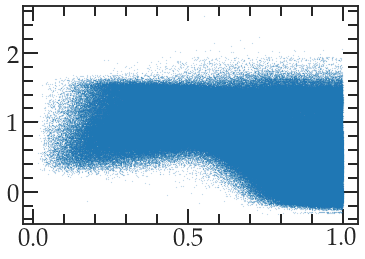

In [19]:
plt.plot(dc2_rand['redshift'], dc2_rand['mag_true_g_lsst'] - dc2_rand['mag_true_r_lsst'],'o', ms=0.1)

In [20]:
dc2_rand_lowz = dc2_rand[dc2_rand['redshift'] < 0.05]

In [21]:
dc2_rand_lowz.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'DC2SFRtot', 'DC2redshift',
       'Ixx_pixel_x', 'Iyy_pixel_x', 'Mag_true_g_sdss_z0',
       'Mag_true_i_sdss_z0', 'Mag_true_r_sdss_z0', 'Mag_true_z_sdss_z0',
       'PZflowSFRtot', 'PZflowredshift', 'cosmodc2_id_truth', 'dec',
       'g-r', 'galaxy_id', 'i-z', 'mag_err_g_photoz', 'mag_err_i_photoz',
       'mag_err_r_photoz', 'mag_err_u_photoz', 'mag_err_y_photoz',
       'mag_err_z_photoz', 'mag_true_Y_lsst', 'mag_true_g_lsst',
       'mag_true_i_lsst', 'mag_true_r_lsst', 'mag_true_u_lsst',
       'mag_true_z_lsst', 'morphology/totalEllipticity',
       'position_angle_true', 'r-i', 'ra', 'sersic_bulge', 'sersic_disk',
       'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true',
       'size_minor_disk_true', 'size_minor_true', 'size_true',
       'stellar_mass', 'bulge_to_total_ratio_i', 'redshift', 'SFRtot',
       'GHOST_objID', 'objectId', 'Ixx_pixel_y', 'Iyy_pixel_y',
       'Ixy_pixel', 'Ixx_pixel', 'Iyy_pixel', 'ELLIPTICITY',
     

In [22]:
dc2_rand.loc[dc2_rand['mag_err_u_photoz']>10, 'mag_err_u_photoz']

7          26.620825
14         49.245789
18         26.620825
56         26.620825
59         26.620825
             ...    
1098869    26.620825
1098873    26.620825
1098890    26.620825
1098900    26.620825
1098920    26.620825
Name: mag_err_u_photoz, Length: 241161, dtype: float64

In [23]:
#add a random shift to the magnitudes -- do this stochastically, higher in u and y, and then change the errors accordingly so that the SNR stays the same
#NOTE: Error on Mag  ~ 1/(S/N) from https://www.eso.org/~ohainaut/ccd/sn.html
#dc2_rand['mag_true_g_lsst'] += 
#calculate the SNR values now 
dc2_rand_lowz['SNR_u_lsst'] = 1/dc2_rand_lowz['mag_err_u_photoz']
dc2_rand_lowz['SNR_g_lsst'] = 1/dc2_rand_lowz['mag_err_g_photoz']
dc2_rand_lowz['SNR_r_lsst'] = 1/dc2_rand_lowz['mag_err_r_photoz']
dc2_rand_lowz['SNR_i_lsst'] = 1/dc2_rand_lowz['mag_err_i_photoz']
dc2_rand_lowz['SNR_z_lsst'] = 1/dc2_rand_lowz['mag_err_z_photoz']
dc2_rand_lowz['SNR_y_lsst'] = 1/dc2_rand_lowz['mag_err_y_photoz']

for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    dc2_rand_lowz['mag_true_%s_lsst_shift'%band] = np.nan

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [12]:
dc2_rand.loc[dc2_rand['mag_err_u_photoz']>10, 'mag_err_u_photoz']

10         17.309639
247        26.620825
493        26.620825
615        26.620825
629        26.620825
             ...    
3025039    26.620825
3025366    26.620825
3025393    26.620825
3025441    26.620825
3025799    52.564075
Name: mag_err_u_photoz, Length: 12367, dtype: float64

In [26]:
#generate a number between -0.25 and 0.25 unless the error is huge, and then shift the mag by [-0.5, 0.5]
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    
    #generate a number between -0.25 and 0.25 unless the error is large, and then shift the mag by [-0.5, 0.5]
    maxval = 0.15
    f = [maxval]*len(dc2_rand_lowz)
    f = np.array(f)
    f[dc2_rand_lowz['mag_err_%s_photoz'%band.lower()] >= 0.5] = maxval*2.
    
    #another option -- set the scale factor to be a gaussian centered on 0 with standard deviation 0.25 and going up with decreasing SNR
    #f =  np.random.normal(loc=0.0, scale=0.25/(dc2_rand['SNR_%s_lsst'%band.lower()]/10.)) #normalize to some SNR
    
    randShift = (np.random.random(len(dc2_rand_lowz)) - 0.5)*f
    dc2_rand_lowz['mag_true_%s_lsst_shift'%band] = dc2_rand_lowz['mag_true_%s_lsst'%band] + randShift

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#update the errors so that the SNR stays the same
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    #dMag = 2.5*np.log10( 1 + 1/SNR) 
    dc2_rand_lowz['mag_err_%s_photoz_shift'%band.lower()] = dc2_rand_lowz['mag_err_%s_photoz'%band.lower()]
    dc2_rand_lowz.loc[dc2_rand_lowz['mag_err_%s_photoz'%band.lower()] < 10., 'mag_err_%s_photoz_shift'%band.lower()] = 2.5*np.log10(1. + 1./dc2_rand_lowz['SNR_%s_lsst'%band.lower()])

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


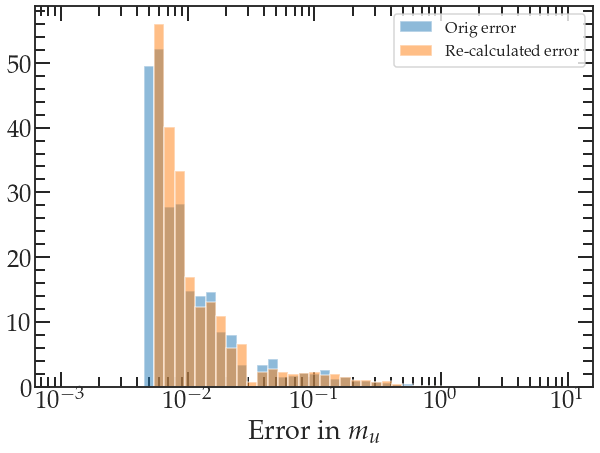

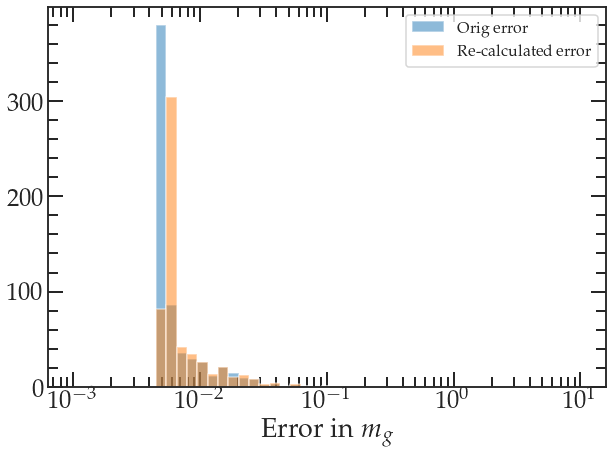

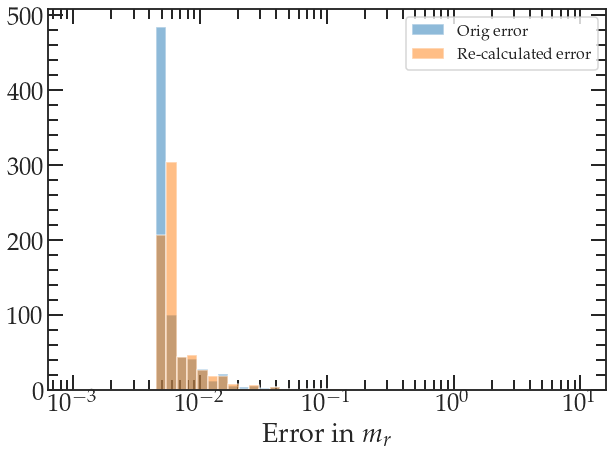

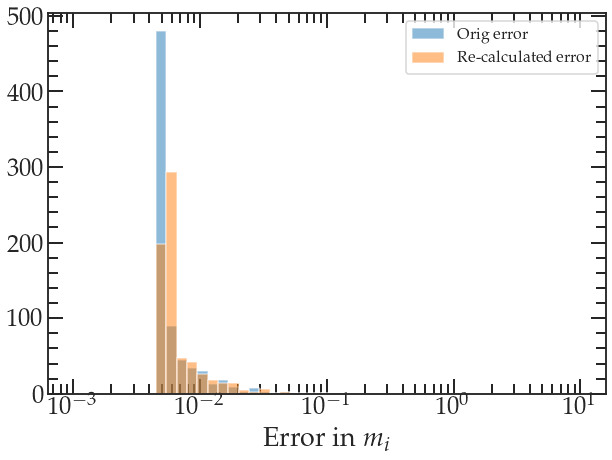

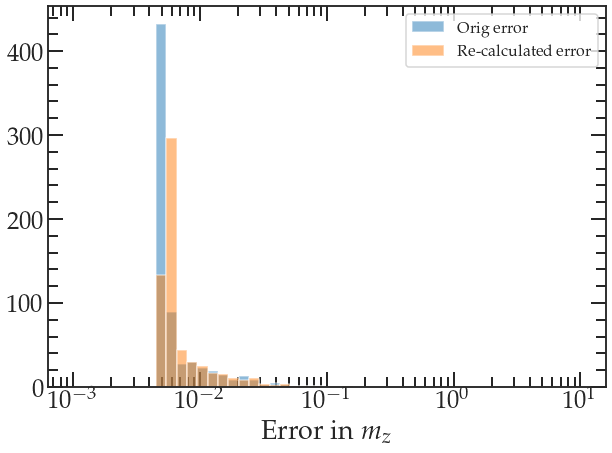

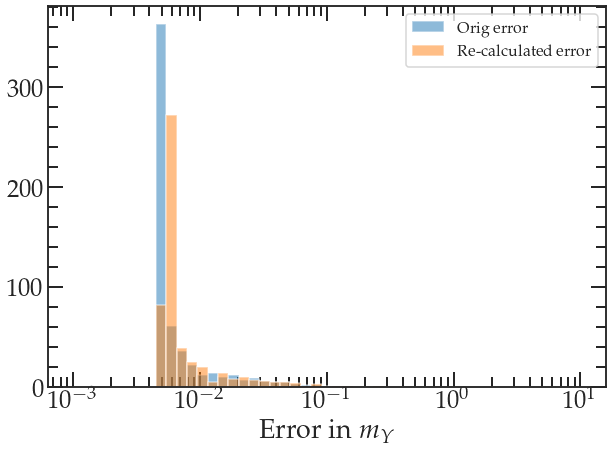

In [28]:
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    plt.figure(figsize=(10,7))

    plt.hist(dc2_rand_lowz['mag_err_%s_photoz'%band.lower()], bins=np.logspace(-3, 1, 50),density=True, alpha=0.5, label='Orig error')
    plt.hist(dc2_rand_lowz['mag_err_%s_photoz_shift'%band.lower()], bins=np.logspace(-3, 1, 50),density=True, alpha=0.5, label='Re-calculated error')
    plt.xscale("log")
    plt.legend(fontsize=16)
    plt.xlabel(r"Error in $m_{%s}$"%band)
    #plt.savefig("/Users/alexgagliano/Documents/Research/DESC/plots/Recalculated_Errors_%s.png"%band,bbox_inches='tight', dpi=200)

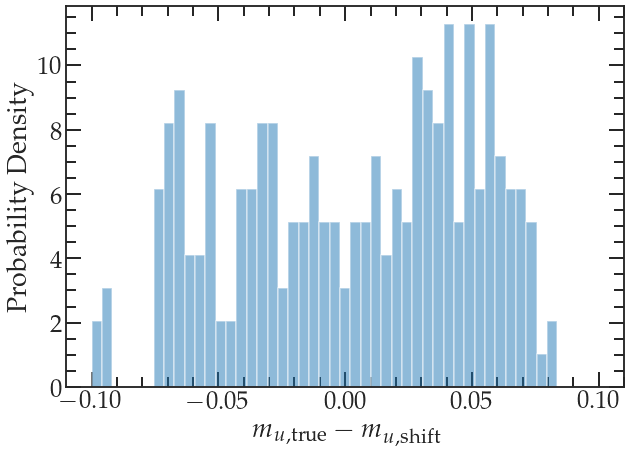

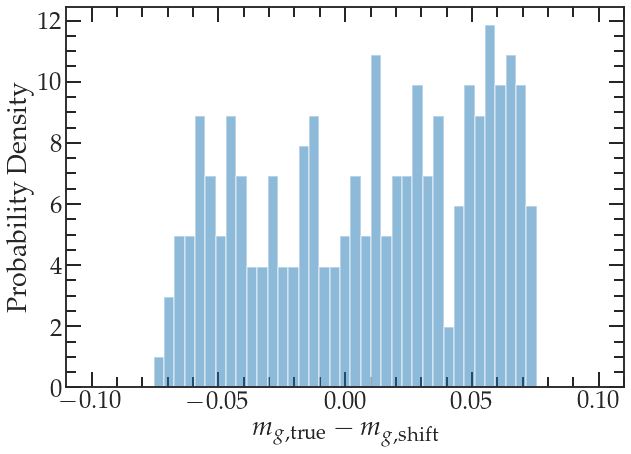

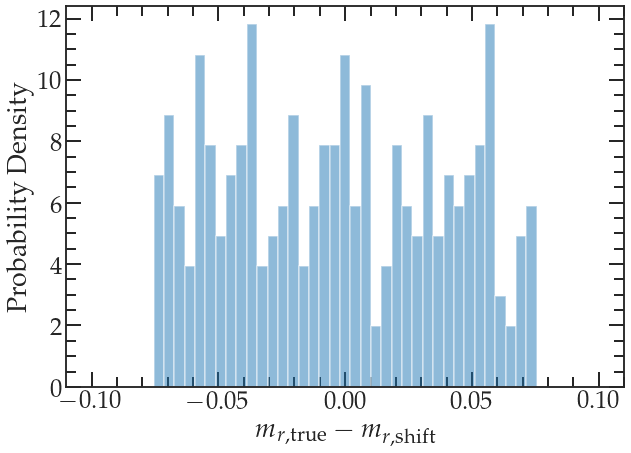

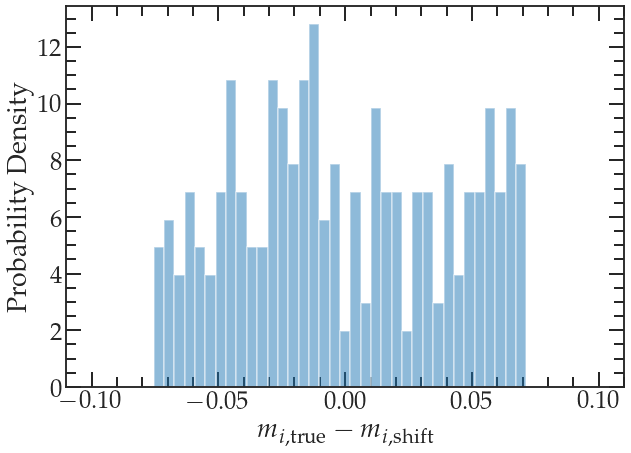

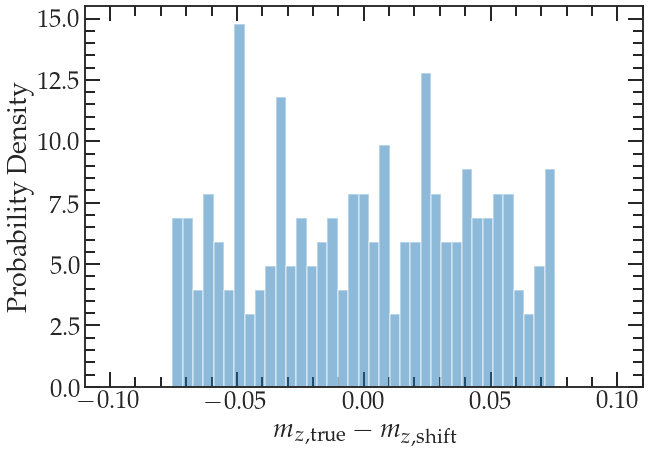

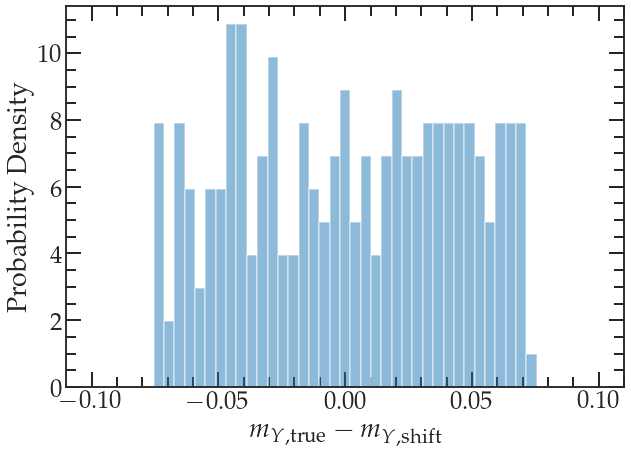

In [29]:
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    plt.figure(figsize=(10,7))
    plt.hist(dc2_rand_lowz['mag_true_%s_lsst'%band].values - dc2_rand_lowz['mag_true_%s_lsst_shift'%band].values,density=True, bins=np.linspace(-0.1, 0.1, 50), alpha=0.5);
    plt.ylabel("Probability Density")
    plt.xlabel(r"$m_{%s, \rm true} - m_{%s, \rm shift}$"%(band, band))
    #plt.savefig("/Users/alexgagliano/Documents/Research/DESC/plots/MagSmearingDifference_%s.png"%band,bbox_inches='tight', dpi=200)

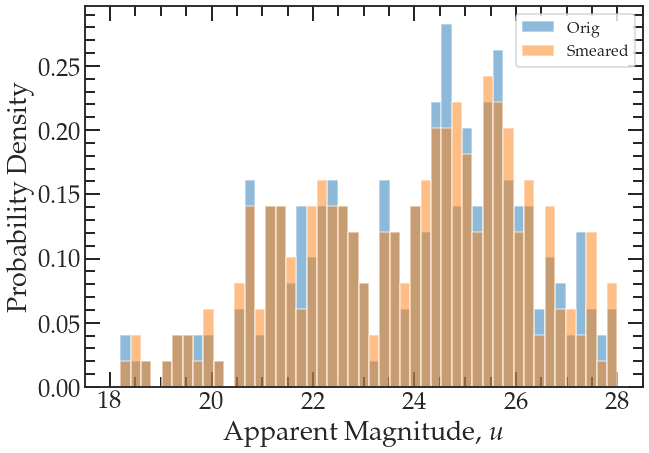

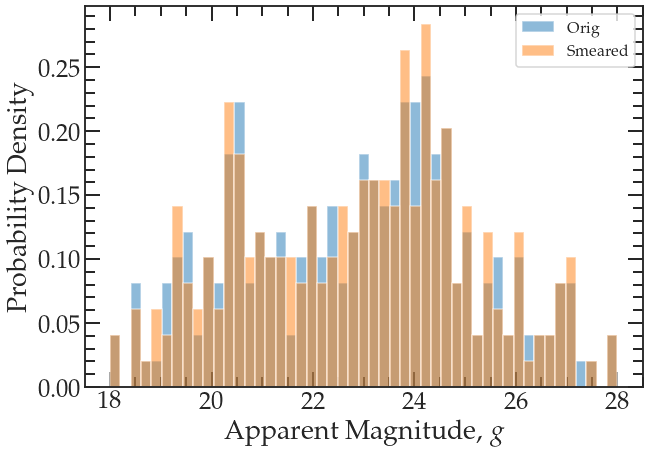

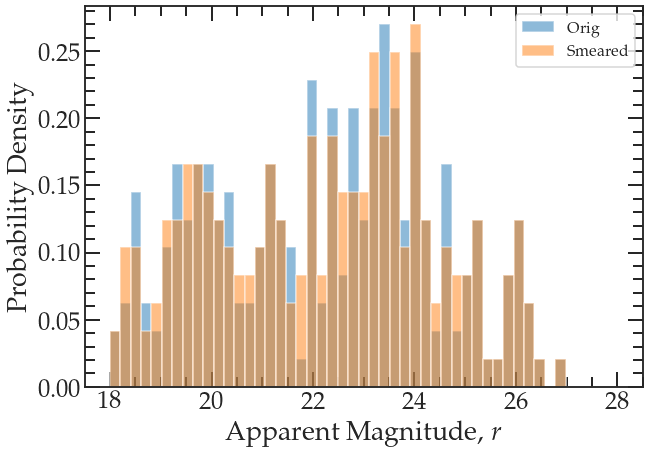

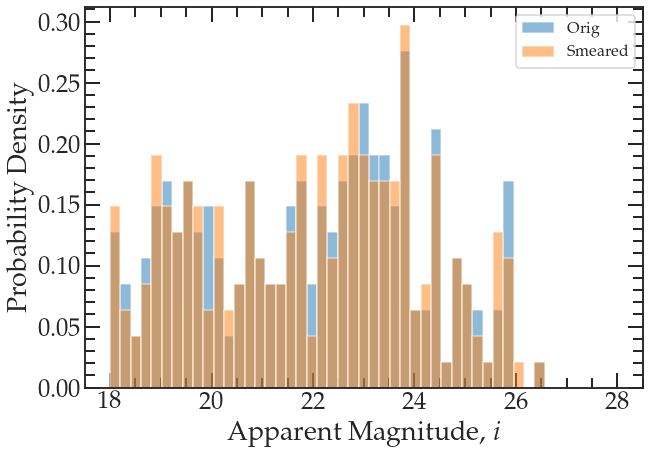

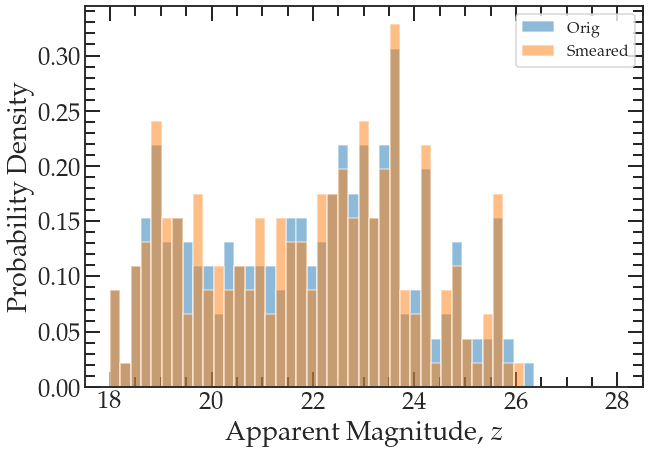

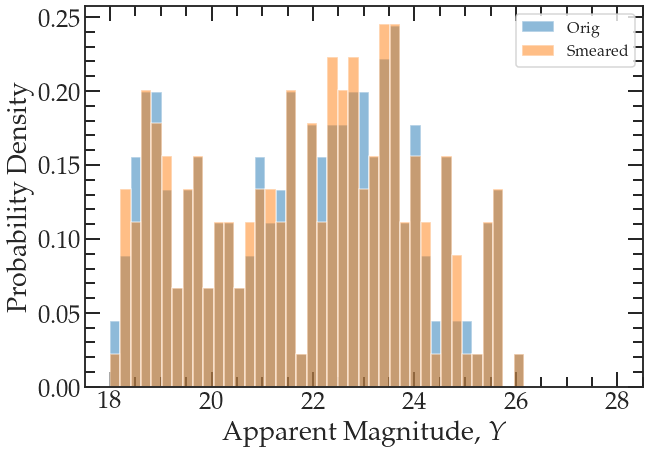

In [30]:
for band in ['u', 'g', 'r', 'i', 'z', 'Y']:
    plt.figure(figsize=(10,7))
    plt.hist(dc2_rand_lowz['mag_true_%s_lsst'%band],density=True, bins=np.linspace(18, 28, 50), label='Orig', alpha=0.5);
    plt.hist(dc2_rand_lowz['mag_true_%s_lsst_shift'%band],density=True, bins=np.linspace(18, 28, 50), label='Smeared', alpha=0.5);
    plt.xlabel(r"Apparent Magnitude, $%s$"%band)
    plt.ylabel("Probability Density")
    plt.legend(fontsize=16)
    #plt.savefig("/Users/alexgagliano/Documents/Research/DESC/plots/MagSmearingHistograms_%s.png"%band,bbox_inches='tight', dpi=200)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$g-r$')

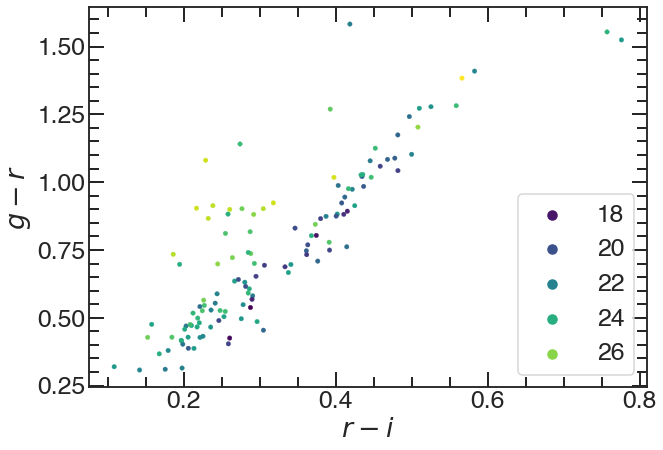

In [59]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

%matplotlib inline 
sub = dc2_rand_lowz[dc2_rand_lowz['DC2redshift']<0.6]

N = 2

plt.figure(figsize=(10,7))
sns.scatterplot(sub['mag_true_r_lsst'].values[::N]-sub['mag_true_i_lsst'].values[::N], 
            sub['mag_true_g_lsst'].values[::N]-sub['mag_true_r_lsst'].values[::N], 
            hue=sub['mag_true_g_lsst'].values[::N], alpha=1, edgecolor=None, s=20, palette='viridis', legend=True)
plt.xlabel(r"$r-i$")
plt.ylabel(r"$g-r$")
#plt.savefig("/Users/alexgagliano/Documents/Research/DESC/plots/gr_randHostlib.png",dpi=200, bbox_inches='tight')

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$g-r$')

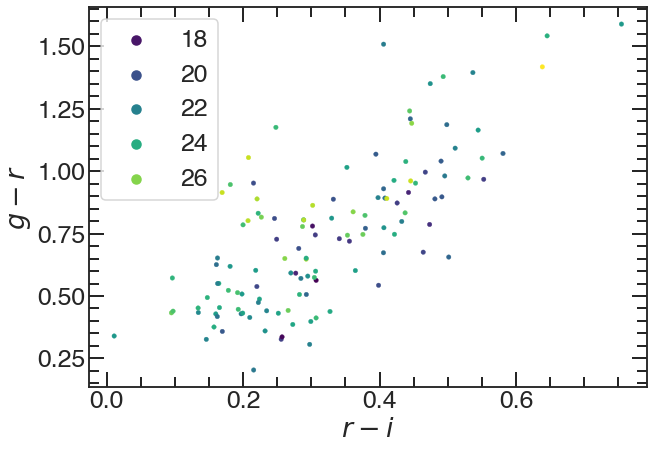

In [58]:
N = 2

plt.figure(figsize=(10,7))
sns.scatterplot(sub['mag_true_r_lsst_shift'].values[::N]-sub['mag_true_i_lsst_shift'].values[::N], 
            sub['mag_true_g_lsst_shift'].values[::N]-sub['mag_true_r_lsst_shift'].values[::N], 
            hue=sub['mag_true_g_lsst_shift'].values[::N], alpha=1, edgecolor=None, s=20, palette='viridis', legend=True)
plt.xlabel(r"$r-i$")
plt.ylabel(r"$g-r$")
#plt.savefig("/Users/alexgagliano/Documents/Research/DESC/plots/gr_smearedHostlib.png",dpi=200, bbox_inches='tight')

In [37]:
sub

,Unnamed: 0,Unnamed: 0.1,DC2SFRtot,DC2redshift,Ixx_pixel_x,Iyy_pixel_x,Mag_true_g_sdss_z0,Mag_true_i_sdss_z0,Mag_true_r_sdss_z0,Mag_true_z_sdss_z0,...,mag_true_r_lsst_shift,mag_true_i_lsst_shift,mag_true_z_lsst_shift,mag_true_Y_lsst_shift,mag_err_u_photoz_shift,mag_err_g_photoz_shift,mag_err_r_photoz_shift,mag_err_i_photoz_shift,mag_err_z_photoz_shift,mag_err_y_photoz_shift
2956,2956,3600,6.345800e+04,0.181597,6.620445,7.150298,-16.379559,-16.754051,-16.633600,-16.806017,...,23.114307,22.862638,22.868685,22.816202,0.152056,0.011481,0.008064,0.009245,0.013389,0.027411
21593,21593,26092,1.449296e+05,0.576319,11.866302,7.870477,-16.817688,-17.737383,-17.439304,-17.913446,...,26.095386,25.234286,24.929772,24.731161,1.150803,0.612945,0.091618,0.061345,0.090858,0.147915
22210,22210,26815,4.131252e+06,0.099210,7.473209,4.749688,-14.863213,-15.529127,-15.311666,-15.647894,...,23.062351,22.763050,22.593658,22.508794,0.121993,0.011442,0.007935,0.008629,0.011577,0.022767
29107,29107,35176,1.487716e+07,0.240893,3.836322,4.058988,-15.382667,-16.027157,-15.801245,-16.155098,...,24.713795,24.337493,24.249054,24.083456,0.633461,0.051288,0.026155,0.028644,0.044364,0.086392
31966,31966,38674,7.103617e+07,0.278945,5.653282,5.730802,-16.474009,-17.163597,-16.892086,-17.347770,...,23.960585,23.760582,23.555620,23.378552,0.254392,0.029418,0.015141,0.016550,0.023346,0.045253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082348,1082348,1311011,1.739085e+04,0.142099,9.334922,7.186534,-14.577553,-15.151552,-14.966287,-15.231589,...,24.199406,24.006432,23.797698,23.801543,0.325519,0.030275,0.017445,0.020400,0.030489,0.066996
1085038,1085038,1314272,7.906166e+06,0.081848,14.726818,43.360828,-19.400364,-20.525330,-20.154312,-20.810291,...,17.776685,17.359719,17.081657,16.925215,0.006074,0.005422,0.005417,0.005417,0.005418,0.005422
1087868,1087868,1317714,2.356859e+07,0.191652,6.402560,5.401261,-15.744059,-16.420124,-16.175997,-16.570751,...,23.737853,23.455208,23.246973,23.165072,0.234530,0.020967,0.011959,0.013347,0.019168,0.037360
1092480,1092480,1323204,1.647909e+08,0.110182,7.282132,7.425460,-18.172010,-19.280281,-18.883465,-19.674046,...,19.756949,19.234947,19.131130,18.819904,0.015599,0.005494,0.005433,0.005432,0.005444,0.005484


In [38]:
dc2_rand_lowz['GHOST_transientclass'] = 'UNMATCHED_KN_SHIFT'
dc2_full = pd.concat([dc2_rand_lowz], ignore_index=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
#del dc2_full['Unnamed: 0']

In [40]:
dc2_full.loc[dc2_full['Ixx_pixel'] != dc2_full['Ixx_pixel'], 'Ixx_pixel'] = -499.5
dc2_full.loc[dc2_full['Iyy_pixel'] != dc2_full['Iyy_pixel'], 'Iyy_pixel'] = -499.5

In [41]:
dc2_full.reset_index(inplace=True, drop=True)

In [42]:
len(dc2_full)

249

In [43]:
#del dc2_full['cosmodc2_id_truth']

In [44]:
dc2_full.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'DC2SFRtot', 'DC2redshift',
       'Ixx_pixel_x', 'Iyy_pixel_x', 'Mag_true_g_sdss_z0',
       'Mag_true_i_sdss_z0', 'Mag_true_r_sdss_z0', 'Mag_true_z_sdss_z0',
       'PZflowSFRtot', 'PZflowredshift', 'cosmodc2_id_truth', 'dec',
       'g-r', 'galaxy_id', 'i-z', 'mag_err_g_photoz', 'mag_err_i_photoz',
       'mag_err_r_photoz', 'mag_err_u_photoz', 'mag_err_y_photoz',
       'mag_err_z_photoz', 'mag_true_Y_lsst', 'mag_true_g_lsst',
       'mag_true_i_lsst', 'mag_true_r_lsst', 'mag_true_u_lsst',
       'mag_true_z_lsst', 'morphology/totalEllipticity',
       'position_angle_true', 'r-i', 'ra', 'sersic_bulge', 'sersic_disk',
       'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true',
       'size_minor_disk_true', 'size_minor_true', 'size_true',
       'stellar_mass', 'bulge_to_total_ratio_i', 'redshift', 'SFRtot',
       'GHOST_objID', 'objectId', 'Ixx_pixel_y', 'Iyy_pixel_y',
       'Ixy_pixel', 'Ixx_pixel', 'Iyy_pixel', 'ELLIPTICITY',
     

In [45]:
#dc2_full['SQRADIUS'] = dc2_full['Ixx_pixel'] + dc2_full['Iyy_pixel']

In [46]:
#del dc2_full['Unnamed: 0.1']

In [47]:
dc2_full.loc[dc2_full['SQRADIUS'] < 0, 'SQRADIUS'] = -999.

In [48]:
for feature in ['mag_true_i_lsst']:
    print(dc2_full.loc[dc2_full[feature] != dc2_full[feature], 'galaxy_id'])

Series([], Name: galaxy_id, dtype: int64)


In [49]:
#dc2_full = dc2_full[~dc2_full['galaxy_id'].isin([9752500000, 9690000000, 11815000000, 11190000000])]

In [50]:
for feature in dc2_full.columns.values:
    dc2_full.loc[dc2_full[feature] != dc2_full[feature], feature] = -999.

In [51]:
#there are only a few nan entries in the random hostlib, so get rid of those entries!
dc2_full = dc2_full[dc2_full['mag_true_i_lsst'] !=  -999]

SN_list = []
for SN in np.unique(dc2_full['GHOST_transientclass'].values):
    SN_list.append(dc2_full[dc2_full['GHOST_transientclass'] == SN])

In [52]:
dc2_full.count()

Unnamed: 0                249
Unnamed: 0.1              249
DC2SFRtot                 249
DC2redshift               249
Ixx_pixel_x               249
                         ... 
mag_err_r_photoz_shift    249
mag_err_i_photoz_shift    249
mag_err_z_photoz_shift    249
mag_err_y_photoz_shift    249
GHOST_transientclass      249
Length: 75, dtype: int64

In [54]:
SNCount = {}

for dc2 in SN_list:
    SN = dc2['GHOST_transientclass'].values[0]
    SN = SN.replace("/", "")
    DF = pd.DataFrame({'VARNAMES:':['GAL:']*len(dc2['stellar_mass'].values), 
                   'GALID':dc2['galaxy_id'].values, 
                    #'galaxy_id':dc2['galaxy_id'].values,
                    'RA_GAL':dc2['ra'].values,
                    'DEC_GAL':dc2['dec'].values,
                   'ZTRUE':dc2['redshift'].values, 
                   'ZPHOT':dc2['PZflowredshift'].values, 
                   'ZPHOT_ERR':[0.01] * len(dc2['PZflowredshift'].values),
                   #'PZflowredshift':dc2['PZflowredshift'].values,
                   #'DC2redshift':dc2['DC2redshift'].values, 
                   'u_obs':dc2['mag_true_u_lsst_shift'].values,
                   'u_obs_err':dc2['mag_err_u_photoz_shift'].values,
                   'g_obs':dc2['mag_true_g_lsst_shift'].values,
                   'g_obs_err':dc2['mag_err_g_photoz_shift'].values,
                   'r_obs':dc2['mag_true_r_lsst_shift'].values, 
                   'r_obs_err':dc2['mag_err_r_photoz_shift'].values,
                   'i_obs':dc2['mag_true_i_lsst_shift'].values,
                   'i_obs_err':dc2['mag_err_i_photoz_shift'].values,
                   'z_obs':dc2['mag_true_z_lsst_shift'].values, 
                   'z_obs_err':dc2['mag_err_z_photoz_shift'].values,
                   'Y_obs':dc2['mag_true_Y_lsst_shift'].values, 
                   'Y_obs_err':dc2['mag_err_y_photoz_shift'].values,
                   'SQRADIUS':dc2['SQRADIUS'].values, 
                   'a0_Sersic':dc2['size_disk_true'].values, 
                   'b0_Sersic':dc2['size_minor_disk_true'].values, 
                   'n0_Sersic':[1.] * len(dc2['size_minor_true'].values),
                   'w0_Sersic':(1 - dc2['bulge_to_total_ratio_i'].values),
                   'a1_Sersic':dc2['size_bulge_true'].values, 
                   'b1_Sersic':dc2['size_minor_bulge_true'].values, 
                   'n1_Sersic':[4] * len(dc2['size_minor_true'].values),
                   'w1_Sersic':dc2['bulge_to_total_ratio_i'].values,
                   'a_rot':dc2['position_angle_true'].values,
                   'ELLIPTICITY':dc2['ELLIPTICITY'].values, 
                   'LOGMASS':np.log10(dc2['stellar_mass'].values), 
                   'LOG_SFR':np.log10(dc2['SFRtot'].values/1.e9), #convert from Msol/Gyr to Msol/yr 
                   'OBJID2':[-999.] * len(dc2['size_minor_true'].values),
                 #  'Mag_true_g_sdss_z0':dc2['Mag_true_g_sdss_z0'].values,
                 #  'Mag_true_r_sdss_z0':dc2['Mag_true_r_sdss_z0'].values,
                 #  'Mag_true_i_sdss_z0':dc2['Mag_true_i_sdss_z0'].values,
                #   'Mag_true_z_sdss_z0':dc2['Mag_true_z_sdss_z0'].values,
                      })
    SNCount[SN] = len(DF)
    #combine with original to get same names out
    DF_merged = DF
    print(DF_merged.count())
    #DF_merged = pd.merge(DF, dc2_full,on='galaxy_id')
    DF_merged.drop_duplicates(subset=['GALID'], inplace=True)
    DF_merged.to_csv("%s_GHOST_Z1_005.HOSTLIB"%SN.replace(" ", ""),index=False, sep=' ')

VARNAMES:      249
GALID          249
RA_GAL         249
DEC_GAL        249
ZTRUE          249
ZPHOT          249
ZPHOT_ERR      249
u_obs          249
u_obs_err      249
g_obs          249
g_obs_err      249
r_obs          249
r_obs_err      249
i_obs          249
i_obs_err      249
z_obs          249
z_obs_err      249
Y_obs          249
Y_obs_err      249
SQRADIUS       249
a0_Sersic      249
b0_Sersic      249
n0_Sersic      249
w0_Sersic      249
a1_Sersic      249
b1_Sersic      249
n1_Sersic      249
w1_Sersic      249
a_rot          249
ELLIPTICITY    249
LOGMASS        249
LOG_SFR        249
OBJID2         249
dtype: int64
